<h1 align=center><font size = 5> Loan Classification</font></h1>

### About

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

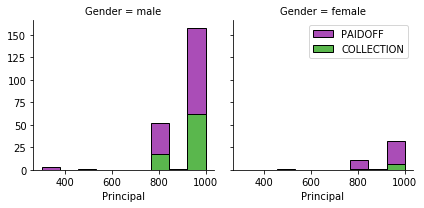

In [17]:
import seaborn as sns
col_pal = ['#AA4DB7','#5AB74D']
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=col_pal, col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

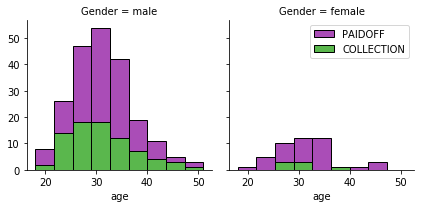

In [18]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=col_pal, col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

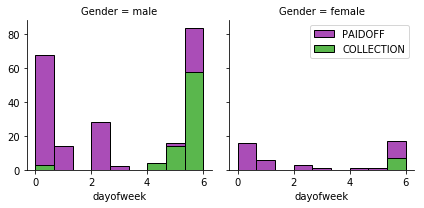

In [19]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=col_pal, col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [20]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [24]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [25]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [27]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [29]:
final_models = {}

# Classification 

Now, let us use the training set to build an accurate model. Then use the test set to report the accuracy of the models:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
jackrd = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    jackrd[n-1] = jaccard_similarity_score(y_test, yhat)

print( "According to the jaccard similarity score, the best accuracy is with k=", jackrd.argmax()+1)

According to the jaccard similarity score, the best accuracy is with k= 7


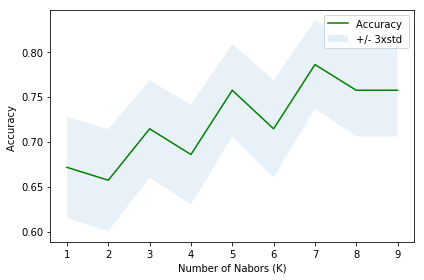

In [32]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7857142857142857 with k= 7


Now that we know which k parameter to use, the final model will be fit on the whole dataset.

In [34]:
final_kNN = KNeighborsClassifier(n_neighbors=7).fit(X, y)
final_models['kNN'] = final_kNN

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
maxDepth = 10
acc_scr = np.zeros((maxDepth-1))

for n in range(1,maxDepth):
    
    theTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train, y_train)
    yhat = theTree.predict(X_test)
    acc_scr[n-1] = metrics.accuracy_score(y_test, yhat)

print( "The best accuracy is with k=", acc_scr.argmax()+1)

The best accuracy is with k= 1


In [36]:
final_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 1).fit(X, y)
final_models['DT'] = final_DT

# Support Vector Machine

In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 4)

{'C': 10, 'gamma': 1}

In [40]:
finalSVC = svm.SVC(C=10, gamma=1, kernel='rbf').fit(X, y)
final_models['SVC'] = finalSVC

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

Cs = [0.01, 0.1, 1, 10, 100]

for i in Cs:
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train, y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    print(i)
    print("F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
    print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))
    print("Log loss: %.4f" % log_loss(y_test, yhat_prob))

0.01
F1-score: 0.6671
Jaccard score: 0.6857
Log loss: 0.5772
0.1
F1-score: 0.7048
Jaccard score: 0.7429
Log loss: 0.4982
1
F1-score: 0.6860
Jaccard score: 0.7143
Log loss: 0.4999
10
F1-score: 0.6860
Jaccard score: 0.7143
Log loss: 0.5192
100
F1-score: 0.6860
Jaccard score: 0.7143
Log loss: 0.5428


In [42]:
final_LR = LogisticRegression(C=0.1, solver='liblinear').fit(X, y)
final_models['LR'] = final_LR

# Another method of obtaining the optimized models

In [43]:
def best_estimator(X, y, nfolds, name):
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn import svm

    if name == 'SVC':
        Cs = [0.01, 0.1, 1, 10, 100]
        gammas = [0.001, 0.01, 0.1, 1]
        ker = ['rbf', 'linear']
        param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':ker}
        x = svm.SVC()
    elif name == 'kNN':
        k = np.arange(1,11)
        param_grid = {'n_neighbors': k}
        x = KNeighborsClassifier()
    elif name == 'DT':
        max_depth = np.arange(1,11)
        crit = ['gini', 'entropy']
        param_grid = {'max_depth': max_depth, 'criterion':crit}
        x = DecisionTreeClassifier()
    elif name == 'LR':
        C = [0.01, 0.1, 1, 10, 100]
        solvers = ['liblinear', 'newton-cg', 'lbfgs']
        param_grid = {'C': C, 'solver': solvers}
        x = LogisticRegression()
    else:
        raise ValueError("The model name "+name+" is not recognized.")
        
    grid_search = GridSearchCV(x, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_estimator_       

In [44]:
def best_estimators(X, y, nfolds, names):
    models = {}
    for i in names:
        models[i] = best_estimator(X, y, nfolds, i)
    return models

In [45]:
final_models_GS = best_estimators(X,y,4,['SVC', 'kNN', 'DT','LR'])

# Model Evaluation using Test set

### Load Test set for evaluation 

In [90]:
df = pd.read_csv('loan_test.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [91]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X_t = Feature
X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)


df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_t = df['loan_status'].values

In [92]:
def report_models(X_t, y_t, models_dict):
    
    alg = []
    jacc = []
    f1 = []
    logloss = []
    
    for name, model in models_dict.items():
        alg.append(name)
        yhat = model.predict(X_t)
        f1.append(f1_score(y_t, yhat, average='weighted'))
        jacc.append(jaccard_similarity_score(y_t, yhat))
        if name == 'LR':
            yhat_prob = model.predict_proba(X_t)
            logloss.append(log_loss(y_t, yhat_prob))
        else:
            logloss.append(np.nan)
            
    return pd.DataFrame.from_dict({'Algorithm': alg, 'Jaccard':jacc, 'F1-score':f1, 'LogLoss':logloss}).round(4).set_index('Algorithm')
        

In [93]:
report_models(X_t, y_t, final_models)

/home/kinase/Programs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Jaccard,F1-score,LogLoss
Algorithm,,,
kNN,0.7222,0.7002,NaN
DT,0.7407,0.6304,NaN
SVC,0.7222,0.7002,NaN
LR,0.7593,0.6718,0.48


In [94]:
report_models(X_t, y_t, final_models_GS)

/home/kinase/Programs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinase/Programs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Jaccard,F1-score,LogLoss
Algorithm,,,
SVC,0.7407,0.6304,NaN
kNN,0.7407,0.7253,NaN
DT,0.7407,0.7253,NaN
LR,0.7407,0.6304,0.5154
